In [1]:
import pandas as pd
from pathlib import Path
import datetime

path = Path.cwd()
path = str(path)+'/GFMS DB/'
path

'/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/'

In [2]:
FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')

FMSA11_작업장비이력 = pd.read_excel(path + 'FMSA11_작업장비이력.xlsx')

FMSX05_장비마스터 = pd.read_csv(path + 'FMSX05_장비마스터_ver2.csv')

FMSB07_자재출고 = pd.read_excel(path + 'FMSB07_자재출고.xlsx')

FMSB03_자재마스터 = pd.read_csv(path + 'FMSB03_자재마스터_ver2.csv')

FMSB03_자재마스터.drop(['class_nm_4','class_cd_4'],axis =1,inplace = True)

FMSB03_자재마스터.rename(columns={'class_nm_3':'jajae_class_nm_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_2':'jajae_class_nm_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_1':'jajae_class_nm_1'},inplace = True)

FMSB03_자재마스터.rename(columns={'class_cd_3':'jajae_class_cd_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_2':'jajae_class_cd_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_1':'jajae_class_cd_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_nm_4':'jangbi_class_nm_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_3':'jangbi_class_nm_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_2':'jangbi_class_nm_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_1':'jangbi_class_nm_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_cd_4':'jangbi_class_cd_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_3':'jangbi_class_cd_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_2':'jangbi_class_cd_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_1':'jangbi_class_cd_1'},inplace = True)

FMSA10_작업지시_결과.rename(columns={'class_nm_4':'job_class_nm_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_3':'job_class_nm_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_2':'job_class_nm_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_1':'job_class_nm_1'},inplace = True)


FMSA10_작업지시_결과.rename(columns={'class_cd_4':'job_class_cd_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_3':'job_class_cd_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_2':'job_class_cd_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_1':'job_class_cd_1'},inplace = True)

fmsa10 =FMSA10_작업지시_결과[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4']]
fmsb03 = FMSB03_자재마스터[['mat_cd','mat_nm','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]
fmsx05 = FMSX05_장비마스터[['fac_cd','fac_nm','jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','fac_instdt']]


FMSB07_자재출고["mat_cd"] = FMSB07_자재출고["mat_cd"].astype("str")
FMSB07_자재출고["mat_cd"] = list(map(lambda x: x[:-3],FMSB07_자재출고["mat_cd"].tolist())) # FMSB03과 inner join하기 위해 mat_cd 형식 일치
fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")
jajae = pd.merge(FMSB07_자재출고,fmsb03 ,on = 'mat_cd', how = 'inner')
jajae = jajae[['job_cd','outw_day','mat_cd','outw_qty','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]


jangbi = pd.merge(FMSA11_작업장비이력, fmsx05, how='inner', on='fac_cd')
data = pd.merge(fmsa10,jangbi, on='job_cd',how = 'inner')

data.drop(['job_cont','chg_sysdt','chg_emp_no'],axis=1,inplace=True)
data = data.dropna()

data['자재매칭여부'] = data['job_cd']
arr_장비 = list(data['job_cd'])
arr_자재 = list(jajae['job_cd'])
#자재 매칭이 안되는 경우
arr = list(set(arr_장비)- set(arr_자재))

def function(x):
    if x in arr:
        return 0
    else:
         return 1

data['자재매칭여부'] = data['자재매칭여부'].apply(function)
df = pd.merge(data,jajae, on='job_cd',how = 'inner')

final = df[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4','fac_cd','fac_nm','fac_instdt','mat_cd','mat_nm_x',
           'jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','자재매칭여부','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_27684/926343042.py:1: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_27684/926343042.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")


In [3]:
final = df[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4','fac_cd','fac_nm','fac_instdt','mat_cd','mat_nm_x',
           'jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','자재매칭여부','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]
final

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,자재매칭여부,mat_nm_x,jajae_class_nm_1,jajae_class_nm_2,jajae_class_nm_3,jajae_class_cd_3
0,211001-00081,1동 1구역 2층 복도내 거실통로유도등 점등불량 교체 작업,2021-10-01,2021-10-01,2021-10-01 오후 1:30:00,2021-10-01 오후 1:45:00,1동 1구역,2층,유도등,거실통로 유도등,...,방재,피난설비,유도등,거실통로 유도등,1,거실통로유도등(LED),소방,피난설비,유도등,504001
1,211001-00070,2-1동 옥상층 66번 CCTV PTZ 동작 불량,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오후 5:31:00,2동 1구역,옥상층,방범시스템,CCTV 카메라,...,통신,방범설비,방범시스템,CCTV 카메라,1,IP카메라,방범,영상감지장치,CCTV,802001
2,211001-00070,2-1동 옥상층 66번 CCTV PTZ 동작 불량,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오후 5:31:00,2동 1구역,옥상층,방범시스템,CCTV 카메라,...,통신,방범설비,방범시스템,CCTV 카메라,1,절연테이프,전기,절연재료,테이프,407001
3,211001-00062,9동 701호해양수산사이버안전센터 분말소화기 받침대 노후로 신품교체.,2021-10-01,2021-10-01,2021-10-01 오후 3:30:00,2021-10-01 오후 4:09:00,9동,7층,소화기구,이동식,...,방재,소화설비,소화기구,이동식,1,소화기받침대,소방,소화기구,소화기구부품,505009
4,211001-00080,별동 차오름 어린이집 1층 식당홀 소화기 위치표지 스티커 미부착,2021-10-01,2021-10-01,2021-10-01 오전 10:00:00,2021-10-01 오전 10:30:00,차오름 어린이집,1층,소화기구,이동식,...,방재,소화설비,소화기구,이동식,1,소화기 표시 스티커,소방,소화기구,소화기구부품,505009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,221011-00023,"7-2동 7층 남자화장실, 7-1동 5층 남자화장실 대변기 누수",2022-10-11,2022-10-11,2022-10-11 오후 1:30:00,2022-10-11 오후 1:59:00,7-1동,5층,위생설비,대변기,...,기계,"위생, 탱크설비",위생설비,대변기,1,푸쉬로드,기계,위생기구,대변기,306002
3129,221011-00023,"7-2동 7층 남자화장실, 7-1동 5층 남자화장실 대변기 누수",2022-10-11,2022-10-11,2022-10-11 오후 1:30:00,2022-10-11 오후 1:59:00,7-1동,5층,위생설비,대변기,...,기계,"위생, 탱크설비",위생설비,대변기,1,푸쉬로드,기계,위생기구,대변기,306002
3130,221011-00037,11동 1-2 남자화장실 소변기 물 안나옴,2022-10-11,2022-10-11,2022-10-11 오전 9:50:00,2022-10-11 오전 10:10:00,11-1동,1층,위생설비,소변기,...,기계,"위생, 탱크설비",위생설비,소변기,1,알칼리건전지,공통,건전지,건전지,110001
3131,221011-00066,13-2동 1층 방재실 R형 수신기 예비전원 불량 교체 (2개),2022-10-11,2022-10-11,2022-10-11 오후 2:30:00,2022-10-11 오후 3:10:00,13-2동,1층,자동화재탐지설비,수신기,...,방재,경보설비,자동화재탐지설비,수신기,1,연(납)축전지,공통,건전지,배터리,110002


In [4]:
# 장비마스터의 소변기
소변기 = fmsx05[fmsx05['jangbi_class_nm_4'] == '소변기']

# 2021-10-01 ~ 2022-10-11 동안 장애가 발생한 소변기
소변기_장애 =data[data['jangbi_class_nm_4']=='소변기']
소변기_장애 = 소변기_장애.sort_values('job_jisi_dt')


소변기_장애['기준일자'] = '2022-10-11'

소변기_장애['기준일자'] = pd.to_datetime(소변기_장애['기준일자'])
소변기_장애['fac_instdt'] = pd.to_datetime(소변기_장애['fac_instdt'])
소변기_장애['job_jisi_dt'] = pd.to_datetime(소변기_장애['job_jisi_dt'])

소변기_장애[['fac_cd','fac_instdt','job_jisi_dt','기준일자']]

소변기_장애['설치-작업간격'] = 소변기_장애['job_jisi_dt'] - 소변기_장애['fac_instdt']

def slicing(x):
    return x[:-4]
소변기_장애['설치-작업간격'] = 소변기_장애['설치-작업간격'].astype(str)
소변기_장애['설치-작업간격'] = 소변기_장애['설치-작업간격'].apply(slicing)
소변기_장애['설치-작업간격'] = 소변기_장애['설치-작업간격'].astype(int)

소변기_장애['작업-작업간격'] = 0
소변기_장애 = 소변기_장애.sort_values(['fac_cd','설치-작업간격'])
소변기_장애

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,fac_instdt,자재매칭여부,기준일자,설치-작업간격,작업-작업간격
3334,220325-00011,1동 2구역 1층 로비 남자화장실 5번째 소변기 급수불량,2022-03-25,2022-03-29,2022-03-29 오전 10:41:00,2022-03-29 오후 3:41:00,1동 2구역,1층,위생설비,소변기,...,(1)소-2-1F(남)134호로비-화장실) 소변기 6,기계,"위생, 탱크설비",위생설비,소변기,2011-07-19,1,2022-10-11,3902,0
5320,220727-00006,1동 3구역 1층 로비 남자 화장실 소변기 급수 계속됨,2022-07-27,2022-07-27,2022-07-27 오전 10:16:00,2022-07-27 오전 10:30:00,1동 3구역,1층,위생설비,소변기,...,(1)소-3-1F(남)144호로비-화장실) 소변기 3,기계,"위생, 탱크설비",위생설비,소변기,2011-07-19,0,2022-10-11,4026,0
2472,220207-00006,1동 1-2구역 2층 남자화장실 두번째 소변기 물 계속나옴,2022-02-07,2022-02-07,2022-02-07 오전 9:50:00,2022-02-07 오전 10:50:00,1동 2구역,2층,위생설비,소변기,...,(1)소-2-2F(남)226호-화장실) 소변기 2,기계,"위생, 탱크설비",위생설비,소변기,2011-07-19,0,2022-10-11,3856,0
5156,220718-00025,1동 1-2구역 302호 앞 남자화장실 첫번째 소변기 물 안나옴,2022-07-18,2022-07-18,2022-07-18 오전 11:05:00,2022-07-18 오전 11:15:00,1동 2구역,3층,위생설비,소변기,...,(1)소-2-3F(남)314호-화장실) 소변기 5,기계,"위생, 탱크설비",위생설비,소변기,2011-07-19,0,2022-10-11,4017,0
4518,220614-00023,1동 3구역 4층439호 남자화장실 소변기 막힘관련,2022-06-14,2022-06-14,2022-06-14 오후 1:36:00,2022-06-14 오후 4:36:00,1동 3구역,4층,위생설비,소변기,...,(1)소-3-4F(남)438호-화장실) 소변기 4,기계,"위생, 탱크설비",위생설비,소변기,2011-07-19,1,2022-10-11,3983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,220307-00057,옥외 체육시설 남자화장실 소변기 센서 불량,2022-03-07,2022-03-07,2022-03-07 오후 3:45:00,2022-03-07 오후 4:05:00,옥외체육시설,1층,위생설비,소변기,...,옥외체육시설-1F 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,2014-01-01,1,2022-10-11,2987,0
3729,220421-00061,8동 옥외체육시설 샤워실 개방 준비 온수공급,2022-04-21,2022-04-21,2022-04-21 오전 9:30:00,2022-04-21 오전 10:40:00,옥외체육시설,1층,위생설비,소변기,...,옥외체육시설-1F 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,2014-01-01,0,2022-10-11,3032,0
3774,220425-00062,옥외 체육시설 남자샤워장 샤워기 손잡이 재조립,2022-04-25,2022-04-25,2022-04-25 오전 9:20:00,2022-04-25 오전 9:52:00,옥외체육시설,1층,위생설비,소변기,...,옥외체육시설-1F 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,2014-01-01,0,2022-10-11,3036,0
3919,220503-00040,"옥외 체육시설 남,여 화장실 세면대 하부 누수발생",2022-05-03,2022-05-03,2022-05-03 오후 1:20:00,2022-05-03 오후 3:30:00,옥외체육시설,1층,위생설비,소변기,...,옥외체육시설-1F 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,2014-01-01,1,2022-10-11,3044,0


In [5]:
for i in range(len(소변기_장애)):
    if i == 0:
        소변기_장애['작업-작업간격'].iloc[i] = 소변기_장애['설치-작업간격'].iloc[i]
    else :
        now_data = 소변기_장애['fac_cd'].iloc[i]
        past_data = 소변기_장애['fac_cd'].iloc[i-1]
        if now_data == past_data:
            소변기_장애['작업-작업간격'].iloc[i] = 소변기_장애['설치-작업간격'].iloc[i] - 소변기_장애['설치-작업간격'].iloc[i-1]
        else :
            소변기_장애['작업-작업간격'].iloc[i] = 소변기_장애['설치-작업간격'].iloc[i]


/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_27684/3413671255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  소변기_장애['작업-작업간격'].iloc[i] = 소변기_장애['설치-작업간격'].iloc[i]
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_27684/3413671255.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  소변기_장애['작업-작업간격'].iloc[i] = 소변기_장애['설치-작업간격'].iloc[i]
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_27684/3413671255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [11]:
max_time = datetime.datetime(2022,10,11)

urinal = pd.merge(소변기[['fac_cd','fac_instdt']],소변기_장애[['fac_cd','작업-작업간격']], on ='fac_cd', how ='left')
urinal

,fac_cd,fac_instdt,작업-작업간격
0,200201020387,2014-11-01,NaN
1,200201020002,2011-07-19,NaN
2,200201020001,2011-07-19,NaN
3,200201020005,2011-07-19,NaN
4,200201020008,2011-07-19,NaN
...,...,...,...
796,200201020351,2014-11-01,NaN
797,200201020331,2014-11-01,NaN
798,200201020356,2014-11-01,NaN
799,200201020358,2014-11-01,NaN


In [6]:
urinal['fac_instdt'] = pd.to_datetime(urinal['fac_instdt'])
urinal['max_time'] = max_time
urinal['max_time'] = pd.to_datetime(urinal['max_time'])
urinal['작업-작업간격'] = urinal['작업-작업간격'].fillna(999999)
urinal.dropna(inplace = True)
def status(df):
    if df['작업-작업간격'] == 999999:
        return 0
    else :
        return 1

urinal['status'] =urinal.apply(status,axis=1)
# for i in range(len(urinal)):
#     if urinal['status'].iloc[i] == 0:
#         urinal['작업-작업간격'].iloc[i] = max_time - urinal['fac_instdt'].iloc[i]

#urinal.apply(day_null,axis=0)

def time(df):
    x = df['작업-작업간격']
    if x == 999999:
        return int(str(df['max_time'] -  df['fac_instdt'])[:-13])
    else :
        return int(x)
#urinal['작업-작업간격'] = urinal.apply(time,axis=1)
urinal['작업-작업간격']= urinal.apply(time,axis=1)
urinal

,fac_cd,fac_instdt,작업-작업간격,max_time,status
0,200201020387,2014-11-01,2901,2022-10-11,0
1,200201020002,2011-07-19,4102,2022-10-11,0
2,200201020001,2011-07-19,4102,2022-10-11,0
3,200201020005,2011-07-19,4102,2022-10-11,0
4,200201020008,2011-07-19,4102,2022-10-11,0
...,...,...,...,...,...
796,200201020351,2014-11-01,2901,2022-10-11,0
797,200201020331,2014-11-01,2901,2022-10-11,0
798,200201020356,2014-11-01,2901,2022-10-11,0
799,200201020358,2014-11-01,2901,2022-10-11,0


In [7]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
urinal.sort_values(by='작업-작업간격', ascending=True)


,fac_cd,fac_instdt,작업-작업간격,max_time,status
399,200201020039,2012-03-01,0,2022-10-11,1
254,200201020337,2019-12-03,0,2022-10-11,1
377,200201020025,2012-03-01,0,2022-10-11,1
518,200201020516,2012-03-01,0,2022-10-11,1
389,200201020032,2012-03-01,0,2022-10-11,1
...,...,...,...,...,...
74,200201020158,2011-07-19,4102,2022-10-11,0
73,200201020176,2011-07-19,4102,2022-10-11,0
72,200201020144,2011-07-19,4102,2022-10-11,0
82,200201020164,2011-07-19,4102,2022-10-11,0


<AxesSubplot:xlabel='timeline'>

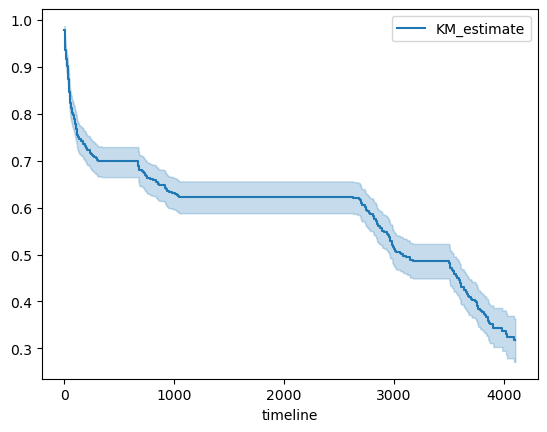

In [8]:
kmf.fit(durations=urinal['작업-작업간격'], event_observed=urinal['status'])
kmf.plot_survival_function()

In [10]:
print('아씨발왜이러노 ㅋㅋ'))

SyntaxError: unmatched ')' (1756555242.py, line 1)